In [27]:
# import libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date']   = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [28]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NAN values from the 'salary_year_avg column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [29]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US['job_skills']

109        python
109             r
109       alteryx
109       tableau
180         excel
           ...   
784882        sql
784882        vba
784882    tableau
784882      excel
784882    alteryx
Name: job_skills, Length: 17440, dtype: object

In [30]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

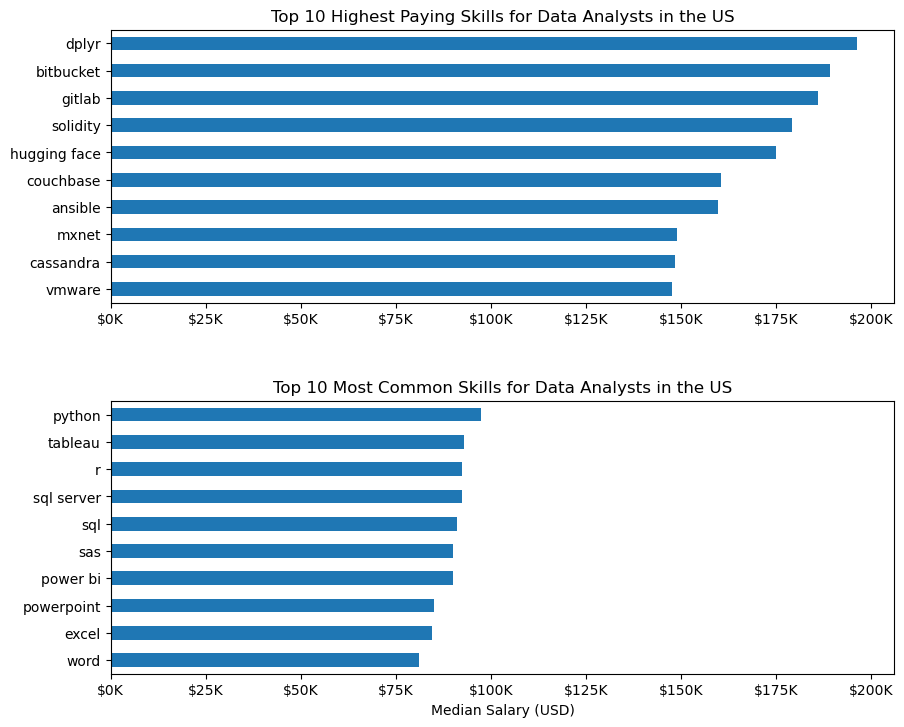

In [38]:
fig, ax = plt.subplots(2, 1)

df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], title='Top 10 Highest Paying Skills for Data Analysts in the US', legend=False)


df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], title='Top 10 Most Common Skills for Data Analysts in the US', legend=False)
ax[1].set_xlim(ax[0].get_xlim())  # Align x-axis limits of both plots
ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[0].set_xlabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
fit_layout = plt.gcf()
fit_layout.set_size_inches(10, 8)
plt.show()
